In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines  # Import lines for custom legend handles
import numpy as np
from scipy import stats
import pickle

In [7]:
# Load the two dataframes from pkl files
dataframe1 = pd.read_pickle('MaxAmps_2022-01-24T13:16:23.425000ZRS00.pkl')
dataframe2 = pd.read_pickle('MaxAmps_2022-01-24T13:16:23.425000ZIRIS00.pkl')
dataframe1

,maxamps,distance,station,frequency
0,7.875058e-05,115.294131,R0306,"(0.1, 0.25)"
1,7.780218e-06,659.840192,R2974,"(0.1, 0.25)"
2,9.728492e-06,739.074461,R34A9,"(0.1, 0.25)"
3,1.550400e-05,689.167677,R4DB9,"(0.1, 0.25)"
4,5.786651e-05,313.774261,RA08A,"(0.1, 0.25)"
6,1.240352e-05,668.245382,RD17E,"(0.1, 0.25)"
7,4.714891e-05,238.403631,RD4D8,"(0.1, 0.25)"
8,1.265597e-04,115.294131,R0306,"(0.25, 0.5)"
9,6.306677e-06,659.840192,R2974,"(0.25, 0.5)"
10,9.474235e-06,739.074461,R34A9,"(0.25, 0.5)"


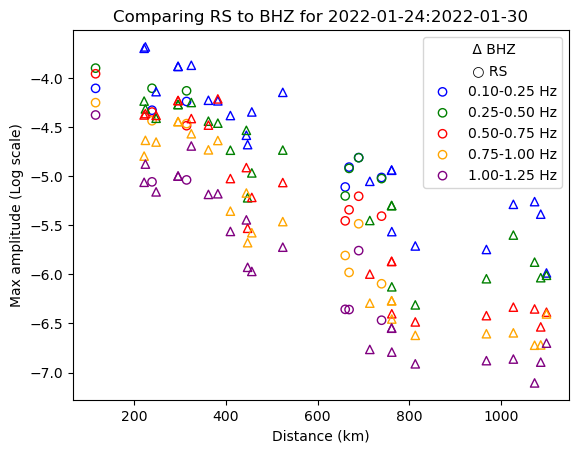

In [13]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines  # Import lines for custom legend handles

# Define the color mapping
color_mapping = {
    (0.10, 0.25): 'blue',
    (0.25, 0.50): 'green',
    (0.50, 0.75): 'red',
    (0.75, 1.00): 'orange',
    (1.00, 1.25): 'purple',
}

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize legend handles and labels lists
legend_handles = []
legend_labels = []

# Loop through unique frequency bands in dataframe1
for freq_range, group in dataframe1.groupby('frequency'):
    freq_str = '{:.2f}-{:.2f} Hz'.format(freq_range[0], freq_range[1])  # Format as a string
    color = color_mapping[freq_range]  # Get color based on frequency range
    # Create a scatter plot for dataframe1 with circles and add to legend
    handle = ax.scatter(group['distance'], np.log10(group['maxamps']), label=freq_str, color=color, marker='o', facecolors='none')
    legend_handles.append(handle)
    legend_labels.append(freq_str)

# Loop through unique frequency bands in dataframe2
for freq_range, group in dataframe2.groupby('frequency'):
    freq_str = '{:.2f}-{:.2f} Hz'.format(freq_range[0], freq_range[1])  # Format as a string
    color = color_mapping[freq_range]  # Get color based on frequency range
    # Create a scatter plot for dataframe2 with triangles and add to legend
    handle = ax.scatter(group['distance'], np.log10(group['maxamps']), label=freq_str, color=color, marker='^', facecolors='none')
    legend_handles.append(handle)
    legend_labels.append(freq_str)

# Create custom legend handles for shapes
iris_handle = mlines.Line2D([], [], color='none', marker='o', markersize=10, label='BHZ (Circles)')
rs_handle = mlines.Line2D([], [], color='none', marker='^', markersize=10, label='RS (Triangles)')

# Sort the legend labels based on frequency range
sorted_legend_labels = sorted(list(set(legend_labels)), key=lambda x: float(x.split('-')[0]))

# Add labels and show the plot
plt.title('Comparing RS to BHZ for 2022-01-24:2022-01-30')
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Max amplitude (Log scale)')

# Create a legend with unique frequency band labels and custom handles
ax.legend(handles=[iris_handle, rs_handle] + legend_handles[:len(sorted_legend_labels)],
          labels=[" Δ BHZ", " ○ RS"] + sorted_legend_labels, loc='best')

# Show the plot
image = plt.savefig('MaxAmps_2022-01-24:2022-01-30ALL.png')
plt.show()

In [79]:
# best fit to 1-1.25, divide all by that normalization factor
# baylee stuff
# 12-29-2022
# all events on that day, all RS Stations, unknown channel???
# comparing all events to raspberry stations


In [80]:
# dataframe_clean = dataframe1.copy()
# dataframe_clean

# # Calculate Z-scores for the data
# z_scores = np.abs(stats.zscore(dataframe_clean["max amplitude"]))

# # Define a threshold for outliers (e.g., z-score > 2)
# threshold = 1.95

# # Create a boolean mask to identify outliers
# outlier_mask = z_scores > threshold

# # Remove outliers from the data
# cleaned_data = dataframe_clean[~outlier_mask]

# # Print the cleaned data
# print(cleaned_data)

# dataframe1 = cleaned_data

   station name    distance                        event  \
0         R0306  115.238564  2022-01-24T13:43:17.729000Z   
1         RA08A  313.333288  2022-01-24T13:43:17.729000Z   
2         RA887  187.867790  2022-01-24T13:43:17.729000Z   
3         RD4D8  238.509174  2022-01-24T13:43:17.729000Z   
4         R0306  115.238564  2022-01-24T13:43:17.729000Z   
..          ...         ...                          ...   
10        RA887  185.018136  2022-01-26T01:14:30.134000Z   
11        RD4D8  238.605405  2022-01-26T01:14:30.134000Z   
12        RA08A  311.382048  2022-01-26T01:14:30.134000Z   
13        RA887  185.018136  2022-01-26T01:14:30.134000Z   
14        RD4D8  238.605405  2022-01-26T01:14:30.134000Z   

                     location  magnitude mag type  max amplitude  \
0    [18.466, -73.3389, 10.0]        4.4       mb       0.000005   
1    [18.466, -73.3389, 10.0]        4.4       mb       0.000002   
2    [18.466, -73.3389, 10.0]        4.4       mb       0.000002   
3    [1

In [81]:
# # If the AllResults.pkl gets corrupted. Do this to startover. 
# import os
# import pickle

# # File paths
# pkl_file_path = '/Users/hkunwer/Documents/research/EQenergy/Wiggles/Attenuation/AllResults.pkl'

# # Step 1: Delete the existing .pkl file if it exists
# if os.path.exists(pkl_file_path):
#     os.remove(pkl_file_path)
#     print(f"Deleted existing file '{pkl_file_path}'.")

# # Step 2: Create a new .pkl file with your desired data
# data_to_save = cleaned_data
# with open(pkl_file_path, 'wb') as pkl_file:
#     pickle.dump(data_to_save, pkl_file)
#     print(f"Created and saved a new .pkl file '{pkl_file_path}'.")

# # Step 3: Optionally, you can load the new .pkl file to verify its contents
# with open(pkl_file_path, 'rb') as pkl_file:
#     loaded_data = pickle.load(pkl_file)
#     print("Loaded data from the new .pkl file:", loaded_data)

Deleted existing file '/Users/hkunwer/Documents/research/EQenergy/Wiggles/Attenuation/AllResults.pkl'.
Created and saved a new .pkl file '/Users/hkunwer/Documents/research/EQenergy/Wiggles/Attenuation/AllResults.pkl'.
Loaded data from the new .pkl file:    station name    distance                        event  \
0         R0306  115.238564  2022-01-24T13:43:17.729000Z   
1         RA08A  313.333288  2022-01-24T13:43:17.729000Z   
2         RA887  187.867790  2022-01-24T13:43:17.729000Z   
3         RD4D8  238.509174  2022-01-24T13:43:17.729000Z   
4         R0306  115.238564  2022-01-24T13:43:17.729000Z   
..          ...         ...                          ...   
10        RA887  185.018136  2022-01-26T01:14:30.134000Z   
11        RD4D8  238.605405  2022-01-26T01:14:30.134000Z   
12        RA08A  311.382048  2022-01-26T01:14:30.134000Z   
13        RA887  185.018136  2022-01-26T01:14:30.134000Z   
14        RD4D8  238.605405  2022-01-26T01:14:30.134000Z   

                     loca